In [1]:
import timm
from PIL import Image
import torch
from torchvision import transforms
from torch.nn import functional as F
import timm.models.mlp_mixer
import numpy as np
import exchange_tensor_array as exchange
import matplotlib.pyplot as plt

from pathlib import Path
from torchvision.datasets.utils import download_url
import json

import copy
#モデル作成
model = timm.create_model("gmlp_s16_224", pretrained=True)
model.eval()
print("model")

transform = transforms.Compose(
    [
        transforms.Resize(256),  # (256, 256) で切り抜く。
        transforms.CenterCrop(224),  # 画像の中心に合わせて、(224, 224) で切り抜く
        transforms.ToTensor(),  # テンソルにする。
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
        ),  # 標準化する。
    ]
)

transform_beta = transforms.Compose(
    [
        transforms.Resize(256),  # (256, 256) で切り抜く。
        transforms.CenterCrop(224),  # 画像の中心に合わせて、(224, 224) で切り抜く
    ]
)

img = Image.open("cat.jpg")
inputs = transform(img)
inputs = inputs.unsqueeze(0)
#plt.imshow(inputs[0].permute(1,2,0))
copy_inputs = copy.deepcopy(inputs)

/usr/local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


model


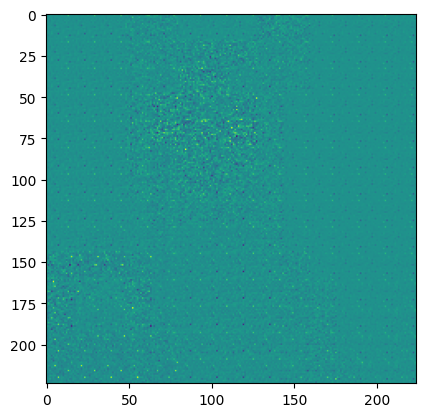

In [22]:
output0 = model(inputs)
mid0 = model.blocks[0].block_output
mid0 = exchange.exchange_tensor_to_array(mid0)
plt.imshow(mid0)

In [96]:
from sklearn.cluster import DBSCAN
y, x = np.where((abs(mid0) > 3))
l = len(y)
p = [ [y[i], x[i]] for i in range(l)]


In [85]:
l

225

array([-1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1, -1, -1,  0,  0,  0,
       -1,  0,  0,  0,  0,  0, -1, -1, -1, -1,  0, -1, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1, -1, -1, -1,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1, -1, -1, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0

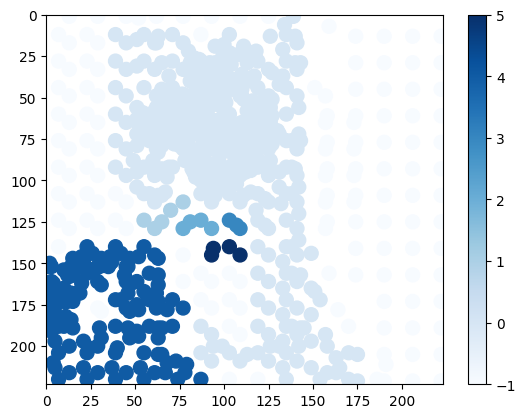

In [97]:
db = DBSCAN(eps=10, min_samples=3)
pred = db.fit_predict(p)
n_c = set(pred)
fig, ax = plt.subplots()
plt.scatter(x, y, s=100, c=pred, cmap="Blues")
plt.colorbar()
plt.xlim(0, 223)
plt.ylim(223, 0)
pred

(223.0, 0.0)

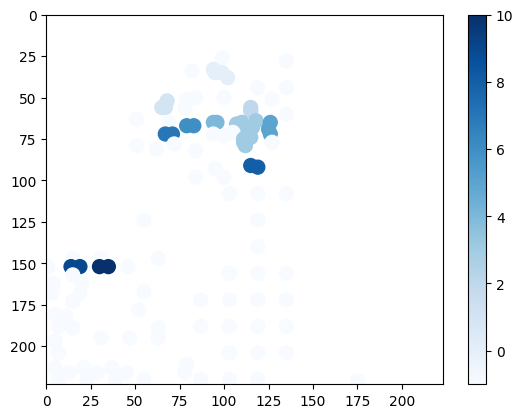

In [78]:
fig, ax = plt.subplots()
plt.scatter(x, y, s=100, c=pred, cmap="Blues")
plt.colorbar()
plt.xlim(0, 223)
plt.ylim(223, 0)

In [40]:
labels = db.labels_
fig = plt.figure(figsize=(1000,1000))
import seaborn as sns
sns.scatterplot(p[:,0],x[:,1],hue=["cluster-{}".format(x) for x in labels])

TypeError: list indices must be integers or slices, not tuple

Error in callback <function _draw_all_if_interactive at 0x7f73c53dadd0> (for post_execute):


ValueError: Image size of 100000x100000 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 100000x100000 with 0 Axes>

In [3]:
inputs.shape

torch.Size([1, 3, 224, 224])

In [5]:
tmp = torch.zeros(1,3,224,224)
tmp.shape

torch.Size([1, 3, 224, 224])

In [6]:
output = model(tmp)

In [9]:
mid = model.blocks[0].block_output
mid = exchange.exchange_tensor_to_array(mid)

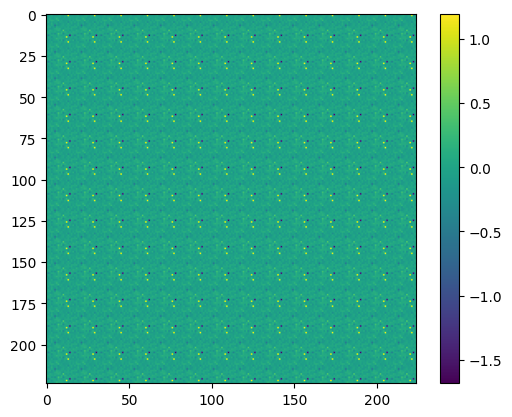

In [15]:
exchange.show_heatmap_with_colorbar(mid)

In [21]:
len(np.where(mid<-0.5)[0])

392

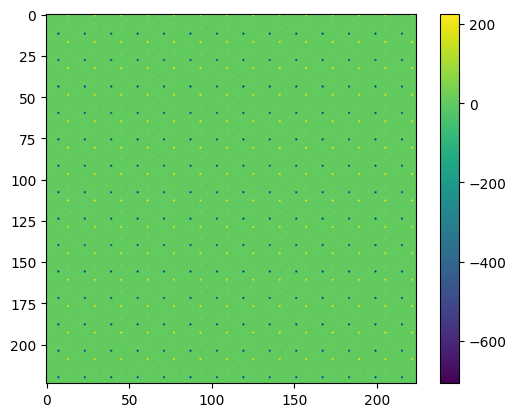

In [29]:
tmp2 = torch.ones(1,3,224,224)
tmp2 *= 255
output2 = model(tmp2)
mid2 = model.blocks[0].block_output
mid2 = exchange.exchange_tensor_to_array(mid2)
exchange.show_heatmap_with_colorbar(mid2)

In [32]:
len(np.where(abs(mid2) < 10)[0])

46648

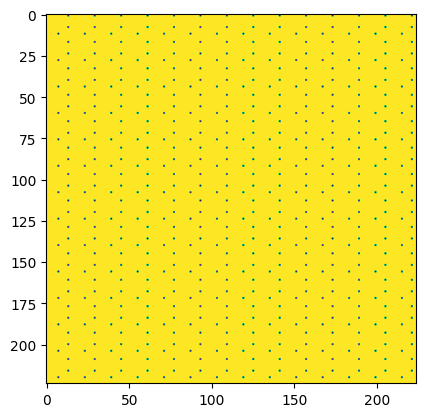

In [36]:
mid2b = np.where(abs(mid2) < 25, 255, 0)
plt.imshow(mid2b)

In [27]:
mid3 = mid + mid2 / 400

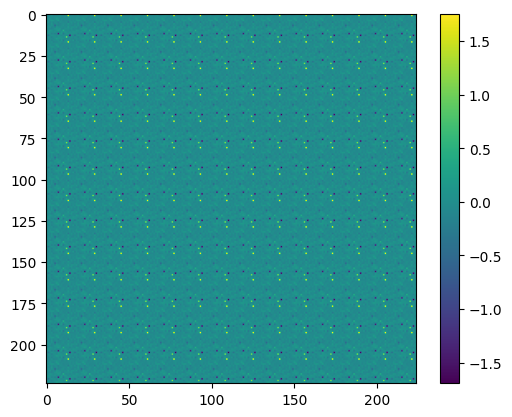

In [28]:
exchange.show_heatmap_with_colorbar(mid3)